# Project Title: Diabetes Prediction Using Machine Learning (PIMA Indians Diabetes Dataset)

#### Step 1: Problem Definition
#### Objective
##### Build a Machine Learning model to predict whether a patient is likely to develop diabetes based on certain medical information.
##### Deploy the model using Streamlit so anyone can input their health data and get predictions interactively.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pima-indians-diabetes-full.csv')

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,194,113,54,233,29.7,1.794,87,1
1,14,102,57,3,562,27.4,1.231,46,0
2,10,153,66,23,817,46.1,1.712,28,1
3,7,153,76,33,261,32.7,1.926,26,1
4,6,88,105,29,826,21.0,0.190,44,0


In [6]:
df.shape

(768, 9)

### Step 2: Understanding the Dataset
#### The PIMA Indians Diabetes Dataset is a standard dataset provided by the UCI repository and available on Kaggle.

### Dataset Details

#### Rows: 768 samples
#### Columns: 9 (8 features + 1 target variable)
#### Features (Input Variables):
#### Pregnancies: Number of times the patient was pregnant
#### Glucose: Plasma glucose concentration (mg/dL)
#### BloodPressure: Diastolic blood pressure (mm Hg)
#### SkinThickness: Triceps skin fold thickness (mm)
#### Insulin: 2-Hour serum insulin (μU/ml)
#### BMI: Body Mass Index (weight in kg/(height in m)^2)
#### DiabetesPedigreeFunction: Genetic predisposition to diabetes
#### Age: Patient's age (years)
#### Target (Output Variable):
#### Outcome: 0 (No Diabetes), 1 (Diabetes)


#### Analyze the Dataset

#### 1. Basic Info:
#### Check for data types and missing values.

In [7]:
print(df.info())
print(df.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                      

Statistical Summary:

#### 2. Statistical Summary:

In [8]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      7.747396  122.269531      73.596354      49.197917  423.916667   
std       5.089934   43.913379      27.100154      28.006330  243.335162   
min       0.000000   50.000000      30.000000       0.000000    0.000000   
25%       3.000000   85.000000      50.000000      25.750000  204.000000   
50%       7.000000  121.000000      72.000000      48.000000  440.000000   
75%      12.000000  160.000000      97.250000      72.000000  631.000000   
max      16.000000  199.000000     121.000000      99.000000  839.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    34.432682                  1.249107   54.790365    0.493490  
std      9.035789                  0.704202   19.823973    0.500283  
min     18.100000                  

### 3. Class Distribution:
#Checked the ratio of classes (diabetic vs non-diabetic).

In [9]:
print(df['Outcome'].value_counts())

Outcome
0    389
1    379
Name: count, dtype: int64


### 4. Data Visualization:
#Used visualizations to better understand the data.

##### a.Histogram for feature distribution

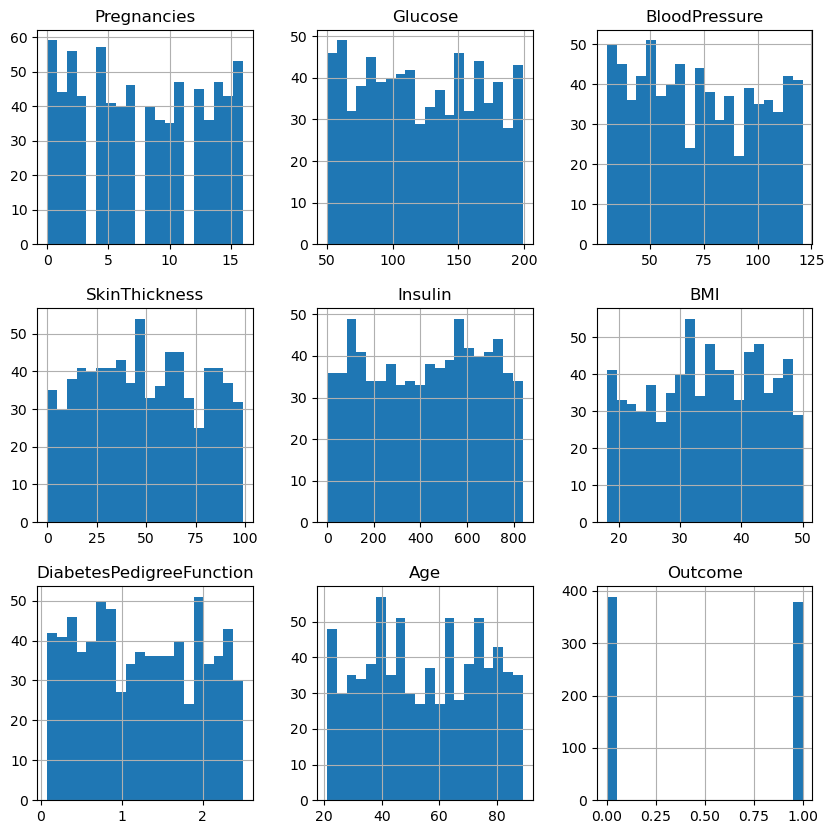

In [10]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(10, 10))
plt.show()

#### b. Correlation Heatmap

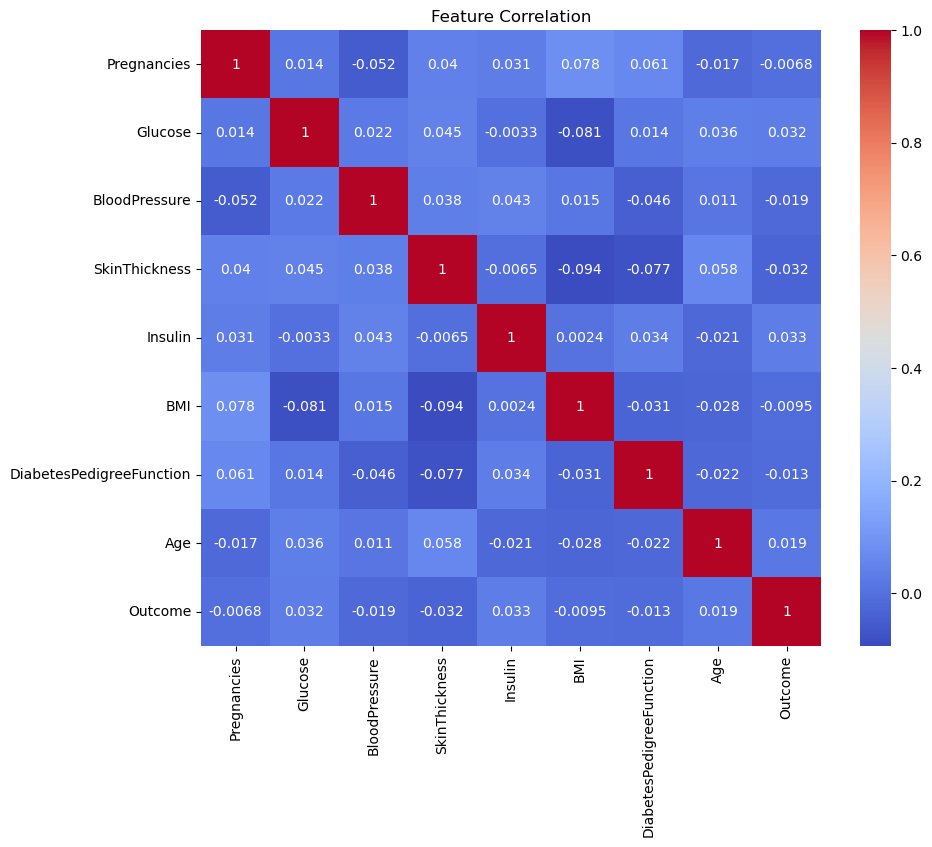

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

### Step 5: Data Preprocessing

#### a. Handle Missing or Zero Values:
#Some columns like Glucose, BloodPressure, SkinThickness, Insulin, and BMI may have zeros instead of missing values. Replace zeros with the median.

In [12]:
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']:
    df[column].replace(0, df[column].median(), inplace=True)

#### b. Feature Scaling (Normalization):
#Used MinMaxScaler to scale the features between 0 and 1.

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop('Outcome', axis=1))
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['Outcome']


#### c. Train-Test Split:
#Split the data into training and testing sets.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 6: Model Building

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4675324675324675
Confusion Matrix:
 [[52 13]
 [69 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.80      0.56        65
           1       0.61      0.22      0.33        89

    accuracy                           0.47       154
   macro avg       0.52      0.51      0.44       154
weighted avg       0.53      0.47      0.43       154



In [16]:
#### 2. Save the Model:
#Save the trained model using joblib for deployment.

In [17]:
import joblib
joblib.dump(model, "diabetes_model.pkl")

['diabetes_model.pkl']